In [1]:
import pandas as pd
import numpy as np
from functions_for_clustering import *
import math
import re
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
import re
regex = re.compile('[^a-zA-Z-.0-9 ]')
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def anec_reader_clustering(data,regexp):
    for i in range(len(data)):
        data[i] = regexp.sub('',data[i])
        data[i] = [float(x) for x in data[i].split()]

    return data

def remove_threshold(data,threshold=10,coords_per_word=16):
    res = []
    for i in range(len(data)):
        tmp = []
        if(len(data[i]) <=threshold * coords_per_word):
            for k in data[i]:
                tmp.append(k)
            res.append(tmp)
        
    return res

In [3]:
anecs = pd.read_csv('good_jokes_eng_padded')

In [4]:
anecs['padded'] = anec_reader_clustering(anecs['padded'],regex)

/var/folders/kt/8pnx4rb10372fz63y2z655nh0000gn/T/ipykernel_67749/1762093730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = regexp.sub('',data[i])
/var/folders/kt/8pnx4rb10372fz63y2z655nh0000gn/T/ipykernel_67749/1762093730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = [float(x) for x in data[i].split()]


In [5]:
clustering_dict = {}
metrics_dict = {}

In [6]:
proper_ten = remove_threshold(anecs['padded'],10)

<AxesSubplot:>

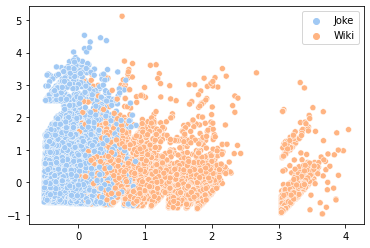

In [49]:
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
c = pca.fit_transform(proper_ten)
k = KMeans(n_clusters = 2)
random.seed(222)
ys = ['Wiki' if x[0]+random.random() >0.98 else 'Joke' for x in c]
sns.scatterplot(x = c.T[0], y=c.T[1],hue=ys,palette = 'pastel')




In [21]:
len(ys)

42302

In [28]:
clustering_result2 = get_clustering(proper_ten[:10000],3 , 1)

/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


In [29]:
clustering_result2

array([687,  17,   2, ...,  64, 546, 273])

[Text(0.5, 1.0, 'Wishart, английские шутки и статьи из Wiki')]

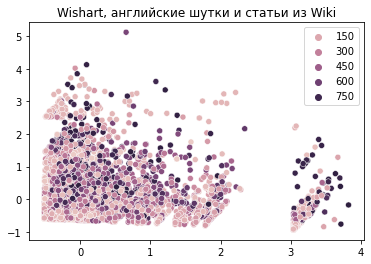

In [31]:
sns.scatterplot(x = c.T[0][:10000], y=c.T[1][:10000],hue=clustering_result2).set(title='Wishart, английские шутки и статьи из Wiki')

In [9]:

X = proper_ten[:10000]
for i in tqdm(range(2, 202)):
    clustering_result2 = get_clustering(proper_ten[:10000],i , 1)
    clustering_dict[i] = clustering_result2
     
    metrics_dict[i] = []

    metrics_dict[i].append(silhouette_score(X, list(clustering_result2), metric='euclidean'))
    metrics_dict[i].append(davies_bouldin_score(X, list(clustering_result2)))
    

  0%|                                                   | 0/200 [00:00<?, ?it/s]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
  0%|▏                                        | 1/200 [00:56<3:07:50, 56.64s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) 

  6%|██▍                                     | 12/200 [11:29<3:00:33, 57.62s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
  6%|██▌                                     | 13/200 [12:26<2:59:42, 57.66s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p =

 12%|████▌                                   | 23/200 [22:06<2:51:12, 58.04s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 12%|████▊                                   | 24/200 [23:04<2:50:15, 58.04s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 17%|██████▊                                 | 34/200 [32:47<2:41:47, 58.48s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 18%|███████                                 | 35/200 [33:46<2:40:55, 58.52s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 22%|█████████                               | 45/200 [43:35<2:32:35, 59.07s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 23%|█████████▏                              | 46/200 [44:34<2:31:36, 59.07s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 28%|███████████▏                            | 56/200 [54:28<2:22:47, 59.50s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 28%|███████████▍                            | 57/200 [55:28<2:21:54, 59.54s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 34%|████████████▋                         | 67/200 [1:05:29<2:13:42, 60.32s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 34%|████████████▉                         | 68/200 [1:06:30<2:12:50, 60.38s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 39%|██████████████▊                       | 78/200 [1:16:37<2:03:49, 60.90s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 40%|███████████████                       | 79/200 [1:17:39<2:02:58, 60.98s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 44%|████████████████▉                     | 89/200 [1:27:54<1:54:00, 61.63s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 45%|█████████████████                     | 90/200 [1:28:55<1:53:05, 61.69s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 50%|██████████████████▌                  | 100/200 [1:39:19<1:44:08, 62.49s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 50%|██████████████████▋                  | 101/200 [1:40:21<1:43:07, 62.50s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 56%|████████████████████▌                | 111/200 [1:50:52<1:33:54, 63.31s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 56%|████████████████████▋                | 112/200 [1:51:56<1:32:59, 63.40s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 61%|██████████████████████▌              | 122/200 [2:02:39<1:23:58, 64.59s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 62%|██████████████████████▊              | 123/200 [2:03:44<1:23:00, 64.68s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 66%|████████████████████████▌            | 133/200 [2:14:39<1:13:11, 65.54s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 67%|████████████████████████▊            | 134/200 [2:15:45<1:12:16, 65.71s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 72%|██████████████████████████▋          | 144/200 [2:26:50<1:02:19, 66.78s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 72%|██████████████████████████▊          | 145/200 [2:27:57<1:01:14, 66.80s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 78%|██████████████████████████████▏        | 155/200 [2:39:15<51:00, 68.00s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 78%|██████████████████████████████▍        | 156/200 [2:40:23<49:53, 68.03s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 83%|████████████████████████████████▎      | 166/200 [2:51:52<39:10, 69.13s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 84%|████████████████████████████████▌      | 167/200 [2:53:02<38:08, 69.34s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 88%|██████████████████████████████████▌    | 177/200 [3:04:46<27:07, 70.76s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 89%|██████████████████████████████████▋    | 178/200 [3:05:57<25:58, 70.85s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p =

KeyboardInterrupt: 

In [13]:
df_kolhoz.to_csv('metrics_wishart.csv')

In [10]:
df_kolhoz = pd.DataFrame()
df_kolhoz['a'] = clustering_dict.keys()
df_kolhoz['b'] = [i[0] for i in metrics_dict.values()]
df_kolhoz['c']= [i[1] for i in metrics_dict.values()]

[Text(0.5, 1.0, 'DB score')]

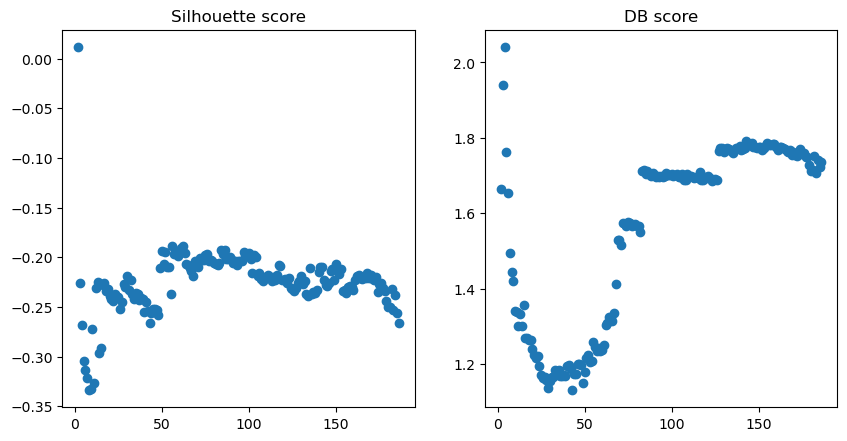

In [12]:
f3, ax3 = plt.subplots(1, 2, figsize =(10,5), dpi=100) 
ax3[0].scatter( df_kolhoz["a"], df_kolhoz["b"],)
ax3[0].set(title='Silhouette score')
ax3[1].scatter( df_kolhoz["a"], df_kolhoz["c"],)
ax3[1].set(title='DB score')

In [24]:
df_kolhoz[df_kolhoz.c -min(df_kolhoz.c)<=0.03]

,a,b,c
26,28,-0.226535,1.157888
27,29,-0.230139,1.137705
28,30,-0.219021,1.156392
41,43,-0.266496,1.130949
47,49,-0.210289,1.150196
